In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path

filepath = Path('/content/drive/MyDrive/TechProAcademyProject/Cleaned_data.csv')

df= pd.read_pickle(filepath)
df.head()


,SalesDate,ProductCategory,SalesAmount,CustomerAge,CustomerGender,CustomerLocation,ProductRatings
0,2023-10-15,Home Appliances,609,22,Male,USA,4
1,2023-09-16,Clothing,1367,22,Female,Australia,5
2,2022-09-06,Electronics,1736,22,Male,UK,2
3,2023-02-24,Clothing,1838,35,Female,India,2
4,2022-09-24,Home Appliances,1829,35,Male,UK,5


# **Descriptive Statistics and Visualization**
### Calculate some statistics for SalesAmount.

In [3]:
# Use the method statistics to calculate some statistics for the dataframe.
# This method can return only numeric values.

df.describe()

,SalesAmount
count,961.000000
mean,978.939646
std,538.714325
min,22.000000
25%,510.000000
50%,987.000000
75%,1428.000000
max,1994.000000


# **Sales Trend per Quarter**
---
# Use pivoting method to understand Sales amount per Quarter.


In [4]:
# Extract the quarter from the date and create a new 'Quarter' column
df['Quarter'] = df['SalesDate'].dt.to_period("Q")

# Pivoting method to extract how many sales and the mean values of every
# sales amount per product category per Quarter
pivoting_data = df.pivot_table(index= 'Quarter', columns = "ProductCategory", values = 'SalesAmount', aggfunc = ['mean','count'])
pivoting_data

mean                                 count  \
ProductCategory     Clothing  Electronics Home Appliances Clothing   
Quarter                                                              
2022Q1           1068.868421   913.166667     1002.243243       38   
2022Q2            969.659091  1011.588235      838.692308       44   
2022Q3            863.806452   927.289474      995.606061       31   
2022Q4            954.891892   993.026316     1235.060606       37   
2023Q1           1003.075000   988.975000      953.944444       40   
2023Q2           1065.950000  1017.000000     1002.976190       40   
2023Q3            926.512821   980.219512      951.575000       39   
2023Q4            933.534884   972.192308      941.666667       43   

                                             
ProductCategory Electronics Home Appliances  
Quarter                                      
2022Q1                   42              37  
2022Q2                   34              39  
2022Q3                   38              33  
2022Q4                   38              33  
2023Q1                   40              36  
2023Q2                   59              42  
2023Q3                   41              40  
2023Q4                   52              45

### Get Average Quartlerly Sales per Prodcut Category and Visualize them.


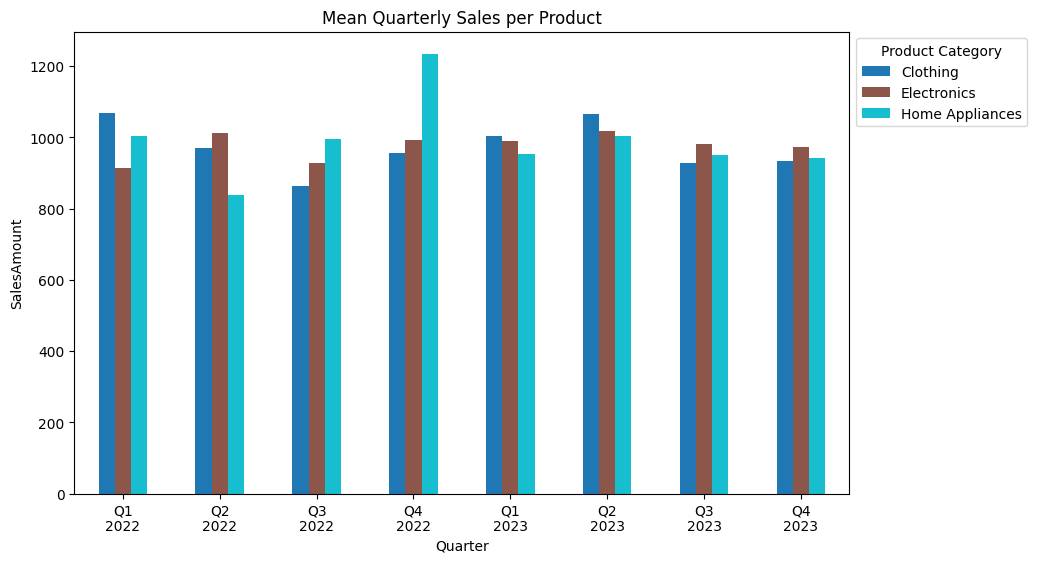

In [5]:
# From pivoting data, take the mean values.
df_pivot = pivoting_data['mean']

# Custom function to format quarter labels
def format_quarter_label(period):
    year = period.year
    quarter = period.quarter
    return f'Q{quarter}\n{year}'

# Apply the custom function to format the quarter labels
df_pivot.index = df_pivot.index.map(format_quarter_label)

# Plot the data
ax = df_pivot.plot(kind='bar', stacked=False, cmap='tab10', figsize=(10, 6))
plt.title('Mean Quarterly Sales per Product')
plt.xlabel("Quarter")
plt.ylabel('SalesAmount')
plt.legend(title='Product Category', bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

### We can also have a time series graph for sales amount of every product per Quarter.

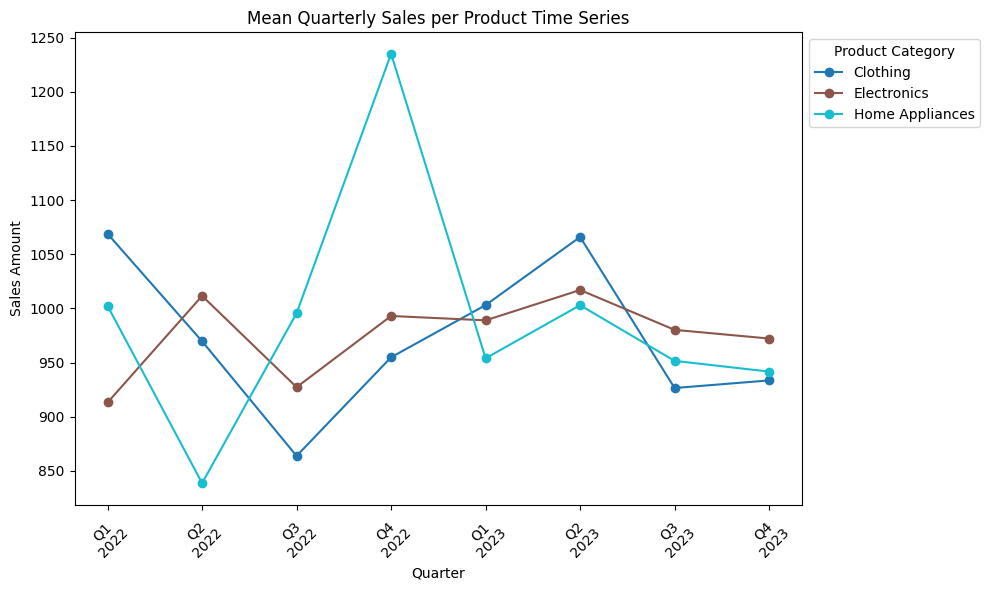

In [6]:
# Plot the data as a time series graph
ax = df_pivot.plot(kind='line', marker='o', figsize=(10, 6), colormap='tab10')
plt.title('Mean Quarterly Sales per Product Time Series')
plt.xlabel("Quarter")
plt.ylabel('Sales Amount')
plt.legend(title='Product Category', bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###Count the Quartlerly Sales per Prodcut Category

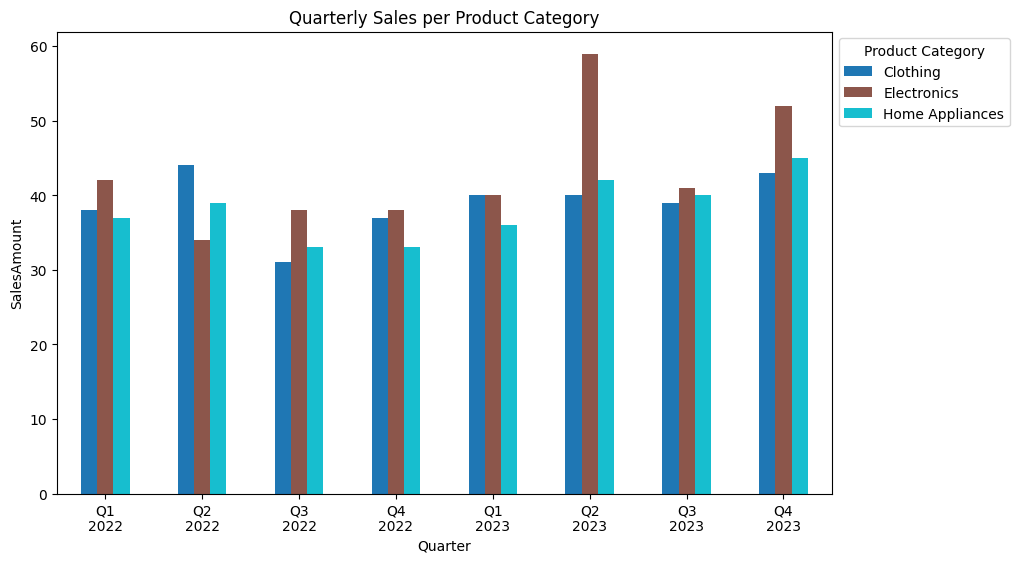

In [7]:
# Pivot the DataFrame to get quarterly sales for each product category
df_pivot = pivoting_data['count']

# Apply the custom function to format the quarter labels
df_pivot.index = df_pivot.index.map(format_quarter_label)

# Plot the data
ax = df_pivot.plot(kind='bar', stacked=False, cmap='tab10', figsize=(10, 6))
plt.title('Quarterly Sales per Product Category')
plt.xlabel("Quarter")
plt.ylabel('SalesAmount')
plt.legend(title='Product Category', bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

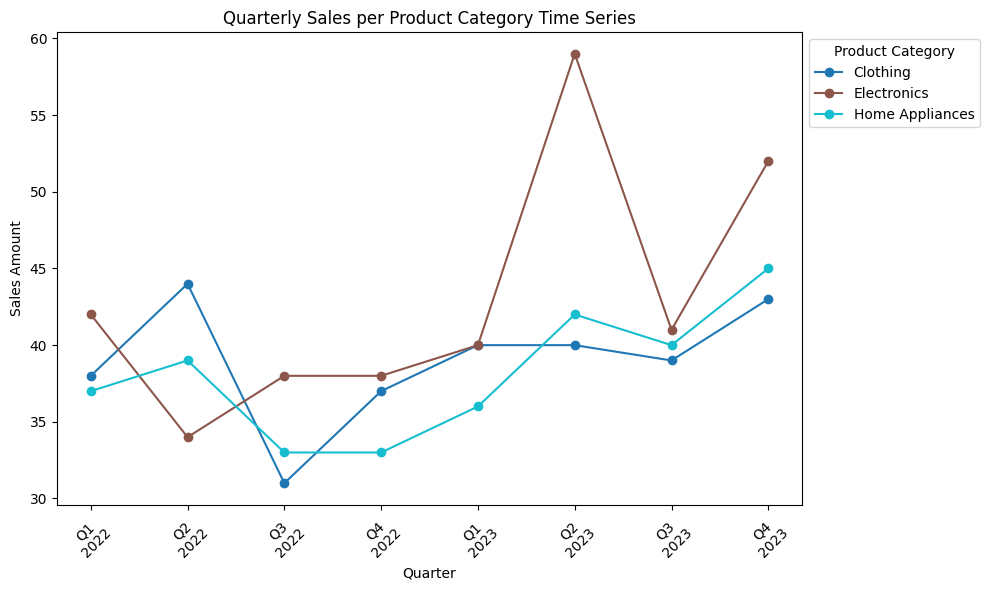

In [8]:
# Plot the data as a time series graph
ax = df_pivot.plot(kind='line', marker='o', figsize=(10, 6), colormap='tab10')
plt.title('Quarterly Sales per Product Category Time Series')
plt.xlabel("Quarter")
plt.ylabel('Sales Amount')
plt.legend(title='Product Category', bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Customer Demographics**
### Count the customers in every country and display them


<ipython-input-9-b3e3c4e195f1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=location_counts.index, y=location_counts, palette="dark")  # Use a color palette


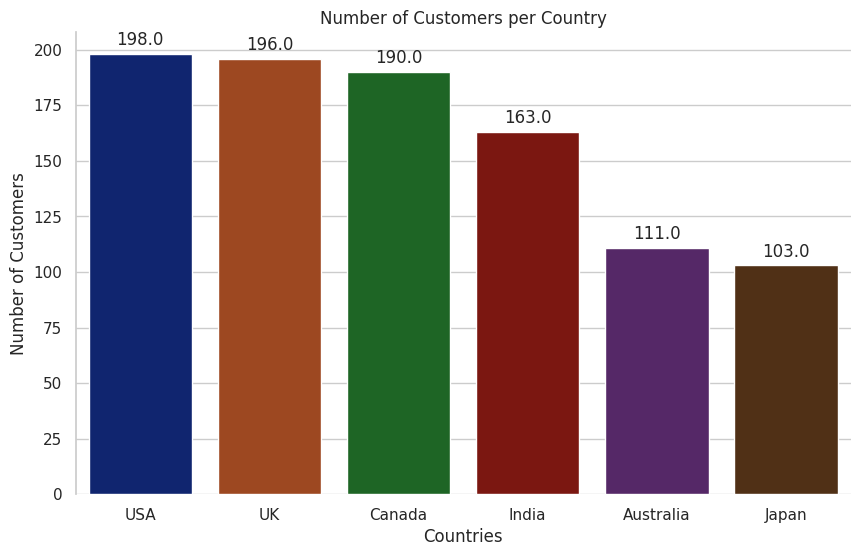

In [9]:
# Calculate location counts
location_counts = df['CustomerLocation'].value_counts()

# Plotting with Seaborn
sns.set(style="whitegrid")  # Set the plot style

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=location_counts.index, y=location_counts, palette="dark")  # Use a color palette

# Remove horizontal grid lines
sns.despine(bottom=True)

# Add data labels on each bar
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel("Countries")
plt.ylabel("Number of Customers")
plt.title("Number of Customers per Country")
plt.show()

### Count the Customers per Gender in every Country and plot them.

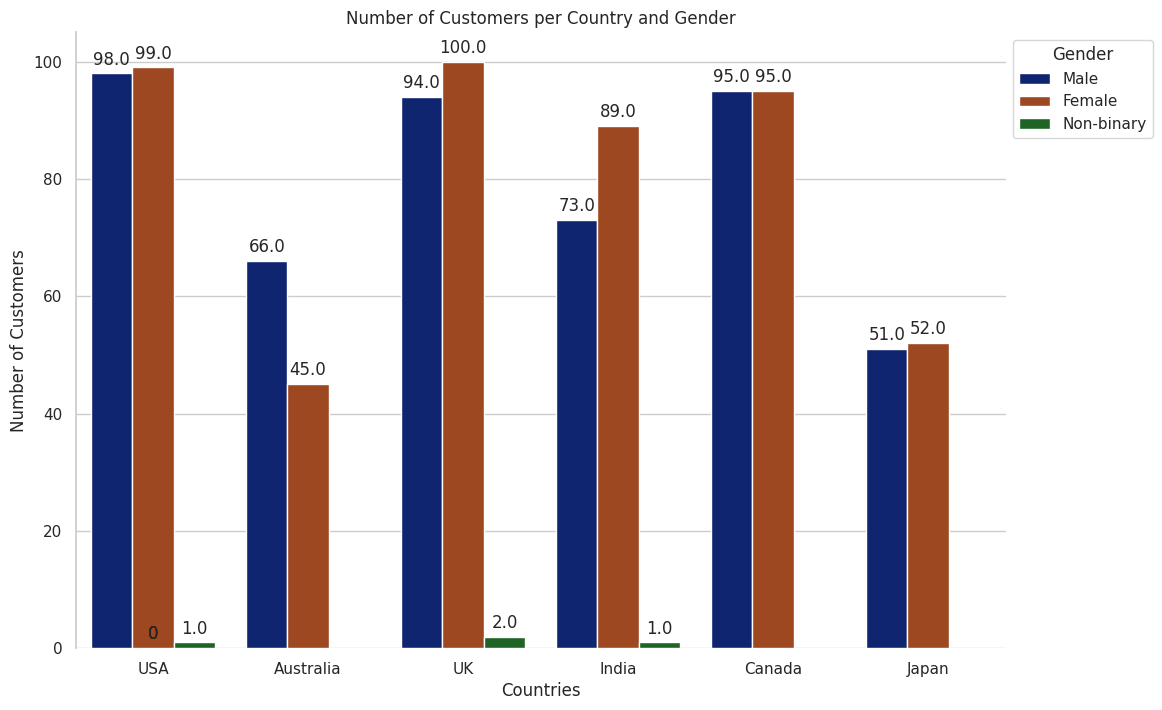

In [10]:
# Calculate location and gender counts
location_gender_counts = df.groupby(['CustomerLocation', 'CustomerGender']).size().unstack()


# Plotting with Seaborn
sns.set(style="whitegrid")  # Set the plot style

plt.figure(figsize=(12, 8))
bar_plot = sns.countplot(data=df, x='CustomerLocation', hue='CustomerGender', palette="dark")

# Remove horizontal grid lines
sns.despine(bottom=True)

# Add data labels on each bar
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel("Countries")
plt.ylabel("Number of Customers")
plt.title("Number of Customers per Country and Gender")
plt.legend(title='Gender',bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

### Count the Customers per Country and Product Category.

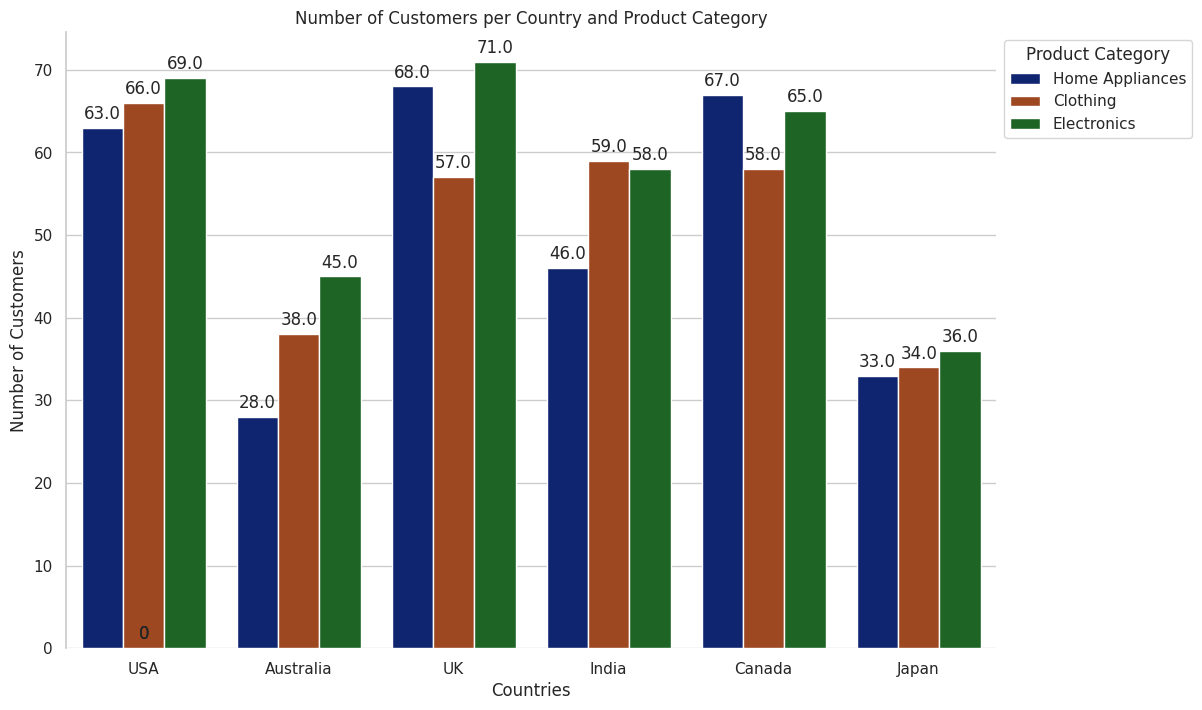

In [11]:
# Plotting with Seaborn
sns.set(style="whitegrid")  # Set the plot style

plt.figure(figsize=(12, 8))
bar_plot = sns.countplot(data=df, x='CustomerLocation', hue='ProductCategory', palette="dark")

# Remove horizontal grid lines
sns.despine(bottom=True)

# Add data labels on each bar
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel("Countries")
plt.ylabel("Number of Customers")
plt.title("Number of Customers per Country and Product Category")
plt.legend(title='Product Category',bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

### Use groupedby, pivoting and aggregation methods to understand Average Sales per Product category.

In [12]:
# Grouped method based on product Category
# Display from the SalesAmount the average and count them
# From Customer age and Product Ratings  return the mean values.
grouped = df.groupby(df['ProductCategory']).agg({'SalesAmount':['mean','count'],
                                       'CustomerAge':['mean'],
                                       'ProductRatings':['mean'],
                                        })
print(grouped)

# Use pivoting to method to change the structure of the DataFrame.
# The indexing will be the product Categories, columns CustomerGender and values sales amount
pivoted_df= df.pivot_table(index='ProductCategory', columns='CustomerGender', values = 'SalesAmount', aggfunc= ['mean','count'])

pivoted_df

                SalesAmount       CustomerAge ProductRatings
                       mean count        mean           mean
ProductCategory                                             
Clothing         975.730769   312         inf            inf
Electronics      976.813953   344         inf            inf
Home Appliances  984.619672   305         inf  1.486007e+302


mean                            count         \
CustomerGender        Female         Male   Non-binary Female   Male   
ProductCategory                                                        
Clothing          963.981707   986.863946  1266.000000  164.0  147.0   
Electronics      1009.041176   945.327586          NaN  170.0  174.0   
Home Appliances   925.130137  1042.916667   848.333333  146.0  156.0   

                            
CustomerGender  Non-binary  
ProductCategory             
Clothing               1.0  
Electronics            NaN  
Home Appliances        3.0

### Count the Sales amount per product and Customer Gender.

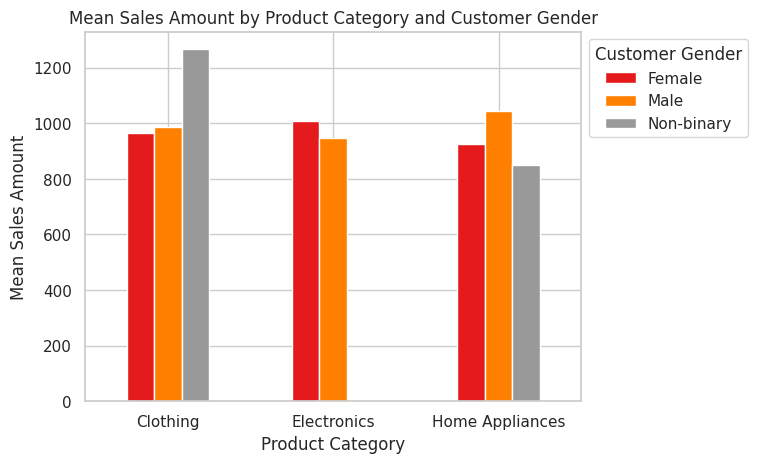

In [13]:
# Create a stacked bar plot for average sale of a product per gender
df_mean = df.pivot_table(index='ProductCategory', columns='CustomerGender', values='SalesAmount', aggfunc='mean')
df_mean.plot(kind='bar', stacked=False, cmap='Set1')
plt.title('Mean Sales Amount by Product Category and Customer Gender')
plt.xlabel('Product Category')
plt.ylabel('Mean Sales Amount')
plt.legend(title='Customer Gender', bbox_to_anchor=(1, 1), loc='upper left')

plt.xticks(rotation=0)

plt.show()

### Average Sales amount per Product and Gender.



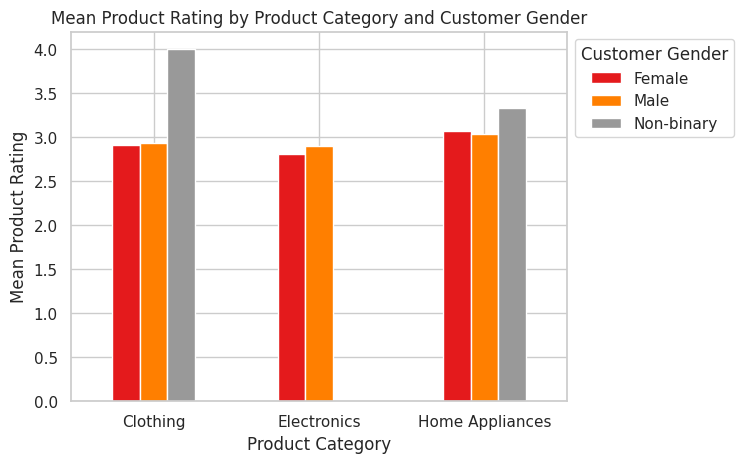

In [19]:
# Create a stacked bar plot for average sale of a product per gender
df['ProductRatings'] = pd.to_numeric(df['ProductRatings'],downcast='integer')
df_mean = df.pivot_table(index='ProductCategory', columns='CustomerGender', values='ProductRatings', aggfunc='mean')

df_mean.plot(kind='bar', stacked=False, cmap='Set1')
plt.title('Mean Product Rating by Product Category and Customer Gender')
plt.xlabel('Product Category')
plt.ylabel('Mean Product Rating')
plt.legend(title='Customer Gender', bbox_to_anchor=(1, 1), loc='upper left')

plt.xticks(rotation=0)

plt.show()

In [15]:
df_mean

CustomerGender,Female,Male,Non-binary
ProductCategory,,,
Clothing,3.190331e+161,2.404838e+144,4.000000
Electronics,1.419496e+167,1.289800e+171,NaN
Home Appliances,1.606531e+143,2.905905e+153,51.333333
